Based on https://github.com/Idilismiguzel/NLP-with-Python/blob/master/Topic%20Modeling/Disneyland_Reviews_Topic_Modeling_LDA.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")
pd.set_option('display.max_colwidth', 80)
from collections import Counter
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
data=pd.read_csv('/content/drive/MyDrive/DTU/8k_tweets_sample_data.csv')
data.head(5)

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Lauren Boebert,@laurenboebert,2022-01-17T23:32:38.000Z,Lauren Boebert\n@laurenboebert\n·\nJan 18,The only solution I’ve ever heard the Left propose for climate change is mor...,NaN,"1,683","2,259",11.7K,[],https://twitter.com/laurenboebert/status/1483220748487569409
1,Catherine,@catherine___c,2022-01-17T22:54:02.000Z,Catherine\n@catherine___c\n·\nJan 17,Climate change doesn’t cause volcanic eruptions.\n158\n64\n762,NaN,158,64,762,[],https://twitter.com/catherine___c/status/1483211036463603713
2,king Keith,@KaConfessor,2022-01-17T23:51:41.000Z,king Keith\n@KaConfessor\n·\nJan 18,Vaccinated tennis ball boy collapses in the tennis court due to climate chan...,NaN,24,118,159,['https://pbs.twimg.com/ext_tw_video_thumb/1483225470502060033/pu/img/GSR6Gi...,https://twitter.com/KaConfessor/status/1483225542824505347
3,PETRIFIED CLIMATE PARENT,@climate_parent,2022-01-17T21:42:04.000Z,PETRIFIED CLIMATE PARENT\n@climate_parent\n·\nJan 17,"North America has experienced an average winter, with temperatures and snowf...",NaN,15,50,158,[],https://twitter.com/climate_parent/status/1483192925152587777
4,Thomas Speight,@Thomas_Sp8,2022-01-17T21:10:40.000Z,Thomas Speight\n@Thomas_Sp8\n·\nJan 17,They're gonna do the same with Climate Change when it starts to get really b...,🅾,4,24,127,['https://pbs.twimg.com/profile_images/1544171414701412352/SnDPDQgD_normal.j...,https://twitter.com/Thomas_Sp8/status/1483185023066902528


In [5]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [6]:
def text_preprocessing(text):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #text = re.sub(r'\', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

In [7]:
data['Text_Clean_List'] = list(map(text_preprocessing, data.Embedded_text))
data['Text_Clean'] = list(map(to_string, data['Text_Clean_List']))

# Text preprocessing

In [8]:
pd.set_option('display.max_colwidth', 15000)
data.sample()
     

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Text_Clean_List,Text_Clean
3742,Gilles Demaneuf,@gdemaneuf,2022-04-10T23:39:02.000Z,Gilles Demaneuf\n@gdemaneuf\n·\nApr 11,Replying to \n@pathogenetics\n @TheSeeker268\n and \n@PhilippMarkolin\nThere is no point discussing with market conspiracy pushers like \n@PhilippMarkolin\n.\n\nHis fake certitudes in the face of a near total absence of epidemiological elements reminds us of climate change denialists.\nThey have their mind set up to deny all human role.\n5\n3\n32,NaN,5,3,32,[],https://twitter.com/gdemaneuf/status/1513300554130231296,"[reply, to, pathogenetics, theseeker268, and, philippmarkolin, there, be, no, point, discuss, with, market, conspiracy, pushers, like, philippmarkolin, his, fake, certitudes, in, the, face, of, near, total, absence, of, epidemiological, elements, remind, us, of, climate, change, denialists, they, have, their, mind, set, up, to, deny, all, human, role, 32]",reply to pathogenetics theseeker268 and philippmarkolin there be no point discuss with market conspiracy pushers like philippmarkolin his fake certitudes in the face of near total absence of epidemiological elements remind us of climate change denialists they have their mind set up to deny all human role 32


Count words before deleting stopwords

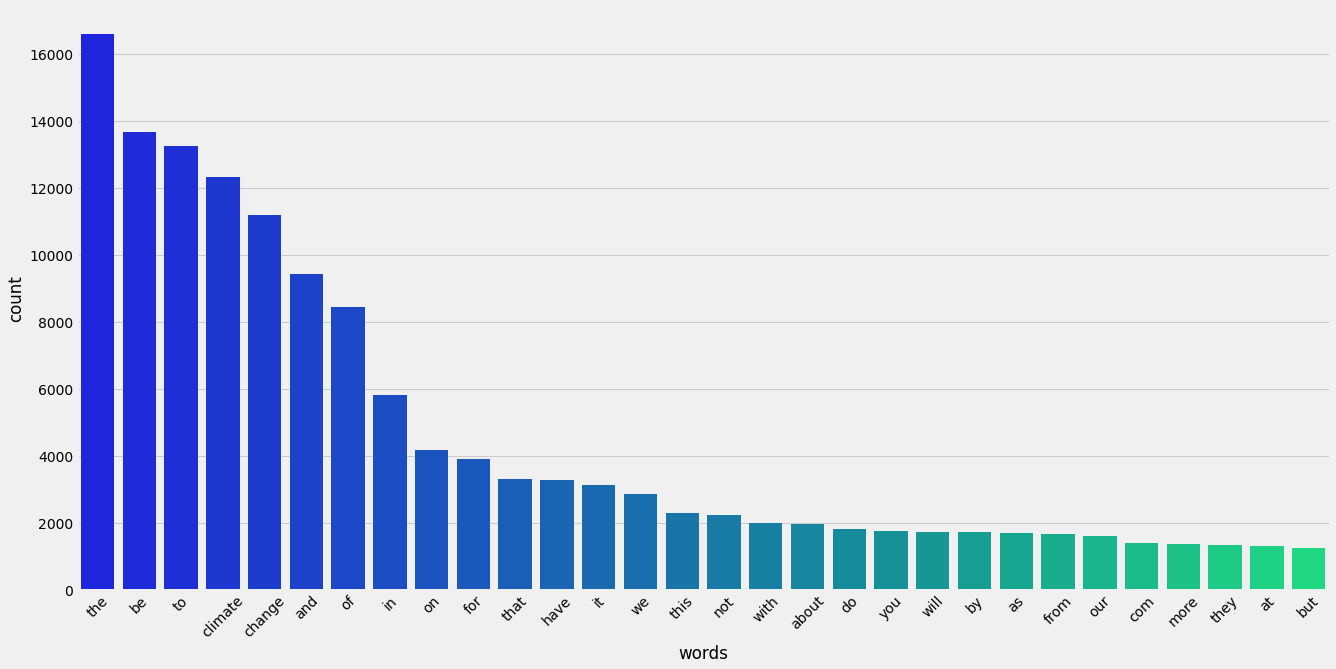

In [9]:
# Join  text together
review_words = ','.join(list(data['Text_Clean'].values))

# Count each word
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

Remove stopwords, add customize words 

In [10]:
stopwords_list = stopwords.words('english')
# add own stopwords
stopwords_list.extend(['climate', 'change', 'com', '...', 'tweet', 'reply'])

data['Text_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in data['Text_Clean_List']]
data['Text_Clean'] = list(map(to_string, data['Text_Clean_List']))

Check most common words after removing stopwords

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'quote'),
  Text(1, 0, 'people'),
  Text(2, 0, 'say'),
  Text(3, 0, 'new'),
  Text(4, 0, 'make'),
  Text(5, 0, 'us'),
  Text(6, 0, 'need'),
  Text(7, 0, 'world'),
  Text(8, 0, 'action'),
  Text(9, 0, 'get'),
  Text(10, 0, 'one'),
  Text(11, 0, 'time'),
  Text(12, 0, 'go'),
  Text(13, 0, 'like'),
  Text(14, 0, 'global'),
  Text(15, 0, 'fight'),
  Text(16, 0, 'take'),
  Text(17, 0, 'impact'),
  Text(18, 0, 'energy'),
  Text(19, 0, 'right'),
  Text(20, 0, 'would'),
  Text(21, 0, 'years'),
  Text(22, 0, 'help'),
  Text(23, 0, 'fuel'),
  Text(24, 0, 'work'),
  Text(25, 0, 'issue'),
  Text(26, 0, 'show'),
  Text(27, 0, 'report'),
  Text(28, 0, 'think'),
  Text(29, 0, '10')])

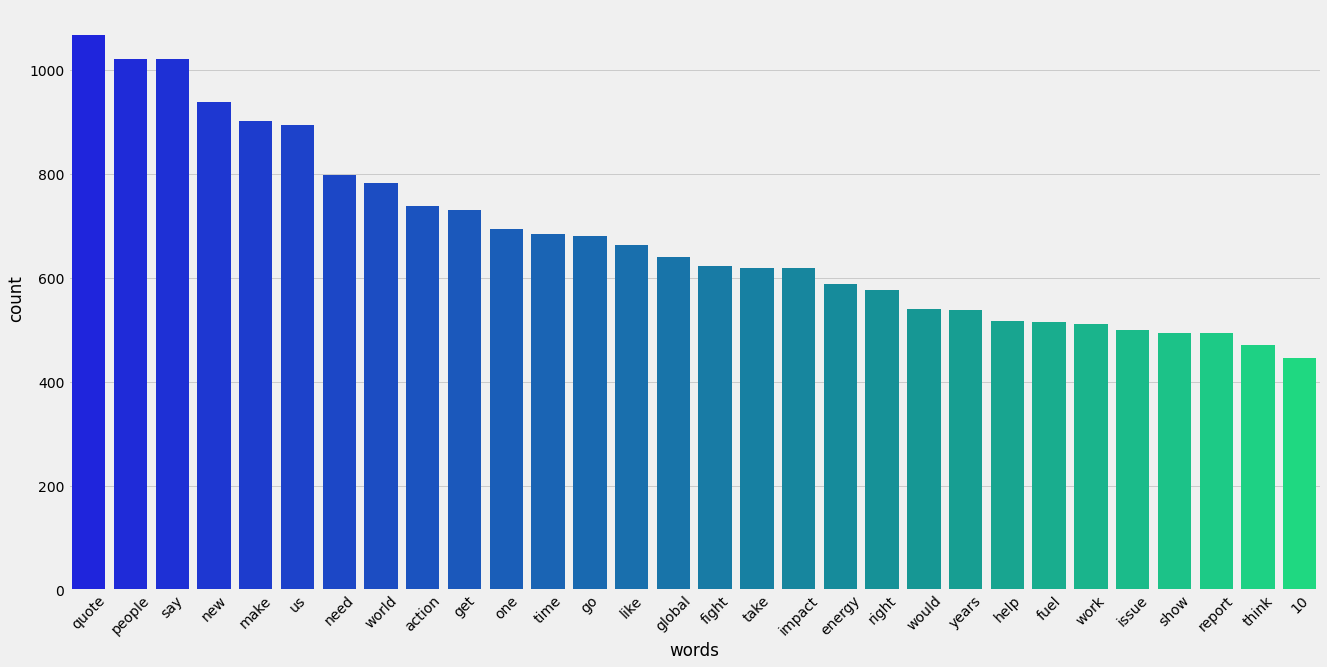

In [11]:

from collections import Counter

# Join  text together
review_words = ','.join(list(data['Text_Clean'].values))

# Count each word
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)
     

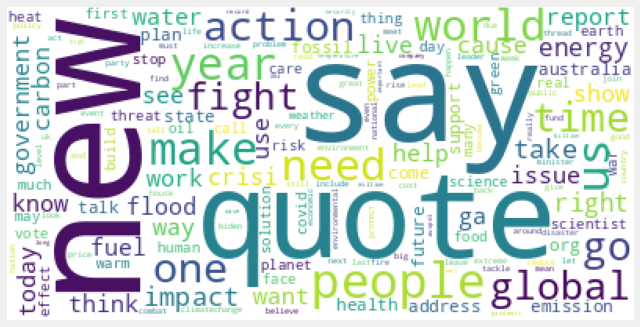

In [12]:
from wordcloud import WordCloud
# Generate the word cloud
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(review_words)
                      
# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# BERTopic

In [14]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 79.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [15]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)



In [16]:
topics, probs = model.fit_transform(data['Text_Clean'])

Batches:   0%|          | 0/283 [00:00<?, ?it/s]

2023-03-21 11:08:02,562 - BERTopic - Transformed documents to Embeddings
2023-03-21 11:08:39,371 - BERTopic - Reduced dimensionality
2023-03-21 11:08:43,954 - BERTopic - Clustered reduced embeddings


In [17]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,4341,-1_quote_people_make_need
1,0,471,0_morrison_auspol_election_australia
2,1,311,1_art_podcast_youth_join
3,2,283,2_heat_temperatures_warm_heatwave
4,3,200,3_gun_right_vote_abortion
5,4,178,4_covid_vaccine_pandemic_vaccines
6,5,170,5_flood_rain_nsw_rainfall
7,6,163,6_hoax_real_think_believe
8,7,123,7_canada_trudeau_justintrudeau_canadians
9,8,122,8_water_drought_lake_rivers


In [18]:
model.visualize_barchart()

There are four key components used in BERTopic [2], those are: 

A transformer embedding model \
UMAP dimensionality reduction \
HDBSCAN clustering \
Cluster tagging using c-TF-IDF 

https://www.pinecone.io/learn/bertopic/

In [23]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=3, n_components=10, min_dist=0.05)
hdbscan_model = HDBSCAN(min_cluster_size=80, min_samples=40,
                        gen_min_span_tree=True,
                        prediction_data=True)

In [24]:
from bertopic import BERTopic

model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(data['Text_Clean'])

Batches:   0%|          | 0/283 [00:00<?, ?it/s]

2023-03-21 11:23:09,753 - BERTopic - Transformed documents to Embeddings
2023-03-21 11:23:19,806 - BERTopic - Reduced dimensionality
2023-03-21 11:23:21,609 - BERTopic - Clustered reduced embeddings


In [25]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,3911,-1_people_quote_say_new
1,0,790,0_australia_auspol_action_election
2,1,586,1_right_vote_gun_manchin
3,2,371,2_forest_tree_biodiversity_species
4,3,310,3_oil_fossil_fuel_fossil fuel
5,4,307,4_hoax_real_think_time
6,5,267,5_energy_biden_new_fuel
7,6,264,6_flood_sea_rise_sea level
8,7,212,7_join_discuss_africa_education
9,8,210,8_drought_water_wildfires_wildfire


In [26]:
model.visualize_barchart()